# Li intercalation energies into anion-substituted anatase TiO<sub>2</sub>

Benjamin J. Morgan

This notebook contains the calculation of lithium-intercalation energies into anion-substituted anatase TiO<sub>2</sub>. The intercalated systems are 3×3×1 supercells of anatase TiO<sub>2</sub>, containing 1 Ti vacancy, with four charge-compensating *X* anions in adjacent equatorial sites, to give a defect cluster [*V*<sub>Ti</sub>+4*X*<sub>O</sub>]. The substituent anions, *X*, are either OH or F.

The intercalation energies are calculated from VASP data, contained in the dataset [&ldquo;TODO&rdquo;](TODO). These calculations are described in the dataset `README` and in the paper [&ldquo;TODO&rdquo;](TODO).

The calculated energies are compared to the intercalation energy into stoichiometric anatase TiO<sub>2</sub> (1 Li in a 3×3×1 supercell).

In [1]:
import pandas as pd
import numpy as np
from vasppy.calculation import *

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import figure_formatting
from figure_formatting import rcParams
from figure_formatting import master_formatting, light_blue, nearly_black

rcParams.update( master_formatting )

In [3]:
def select_entries( keys, fulldict ):
    return dict( ( k, fulldict[k] ) for k in keys )

In [4]:
# load calculation data
all_stoichiometric = import_calculations_from_file( '../Data/stoichiometric/stoichiometric_anatase.yaml' )
stoichiometric = select_entries( [ 'stoichiometric anatase',
                                   'stoichiometric anatase + Li'],
                                all_stoichiometric )
                                
all_tio2_calculations = import_calculations_from_file( '../Data/vacancy_intercalation/vacancy_intercalation.yaml' )
tio2_calculations = select_entries( [ 'TiO2 4OH + Li', 
                                      'TiO2 4OH stoichiometric',
                                      'TiO2 1F+3OH + Li', 
                                      'TiO2 1F+3OH stoichiometric',
                                      'TiO2 2F+2OH cis + Li',
                                      'TiO2 2F+2OH cis stoichiometric',
                                      'TiO2 2F+2OH trans + Li',
                                      'TiO2 2F+2OH trans stoichiometric',
                                      'TiO2 3F+1OH + Li',
                                      'TiO2 3F+1OH stoichiometric',
                                      'TiO2 4F + Li',
                                      'TiO2 4F stoichiometric' ],
                                    all_tio2_calculations )
all_elemental_reference = import_calculations_from_file( '../Data/elemental_reference/elemental_reference.yaml' )
elemental_reference = select_entries( ['elemental Li'], all_elemental_reference )

calculations = {**stoichiometric, **tio2_calculations, **elemental_reference}

In [5]:
for c in calculations:
    print( c )

stoichiometric anatase
stoichiometric anatase + Li
TiO2 4OH + Li
TiO2 4OH stoichiometric
TiO2 1F+3OH + Li
TiO2 1F+3OH stoichiometric
TiO2 2F+2OH cis + Li
TiO2 2F+2OH cis stoichiometric
TiO2 2F+2OH trans + Li
TiO2 2F+2OH trans stoichiometric
TiO2 3F+1OH + Li
TiO2 3F+1OH stoichiometric
TiO2 4F + Li
TiO2 4F stoichiometric
elemental Li


In [6]:
calculations['elemental Li'] /= calculations['elemental Li'].stoichiometry['Li']

In [7]:
to_calculate = [ [ 4, '4F' ],
                 [ 3, '3F+1OH' ],
                 [ 2, '2F+2OH cis' ],
                 [ 2, '2F+2OH trans' ],
                 [ 1, '1F+3OH' ],
                 [ 0, '4OH' ] ]

to_plot = []
for n_F, string in to_calculate:
#     print( n_OH, string )
    intercalation_energy = delta_E( [ calculations['TiO2 {} stoichiometric'.format( string )], calculations['elemental Li'] ], 
                                    [ calculations['TiO2 {} + Li'.format( string ) ] ] ) 
    to_plot.append( [ n_F, intercalation_energy ] )


In [8]:
df = pd.DataFrame( to_plot, columns=[ 'n_F', 'E_int' ] )
df.round(3)

,n_F,E_int
0,4,-2.683
1,3,-1.975
2,2,-1.851
3,2,-1.792
4,1,-1.455
5,0,-1.336


In [9]:
anatase_intercalation_energy = delta_E( [ calculations['stoichiometric anatase'], calculations['elemental Li'] ], 
                                        [ calculations['stoichiometric anatase + Li'.format( string ) ] ] ) 

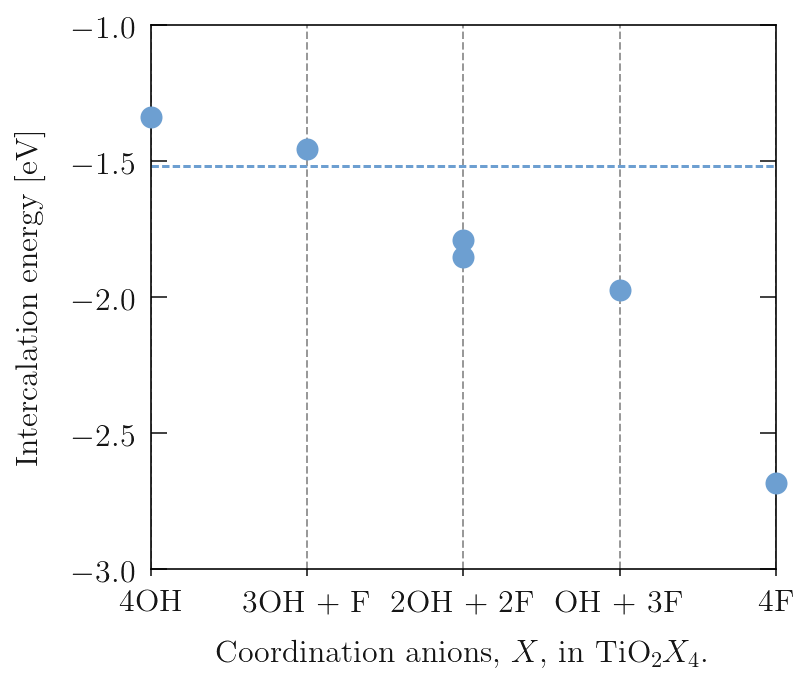

In [10]:
f = plt.figure(figsize=(5.6,5.0))
ax = f.add_subplot(111)
plt.plot( df['n_F'], df['E_int'], 'o', color=light_blue, clip_on=False, zorder=10 )
plt.axhline( anatase_intercalation_energy, linestyle='--', color=light_blue )
plt.xticks( [ 0, 1, 2, 3, 4 ], [ r'4OH', '3OH + F','2OH + 2F','OH + 3F','4F'] )
plt.xlim( 0, 4 )
plt.yticks( [ -3.0, -2.5, -2.0, -1.5, -1.0 ] )
plt.ylim( -3, -1 )
plt.grid( axis='x', color='grey', linestyle='--')
plt.ylabel( 'Intercalation energy [eV]' )
plt.xlabel( r'Coordination anions, $X$,  in TiO$_2X_4$.' )
plt.savefig( '../figures/Li_intercalation_energies.pdf' )